Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
Top 5 Decision Tree Features: [(np.str_('mean concave points'), np.float64(0.6914195549049809)), (np.str_('worst concave points'), np.float64(0.06565079001137543)), (np.str_('mean texture'), np.float64(0.05847766231107586)), (np.str_('worst radius'), np.float64(0.05229926933685694)), (np.str_('worst perimeter'), np.float64(0.051493960584869665))]
Top 5 Random Forest Features: [(np.str_('worst area'), np.float64(0.15389236463205394)), (np.str_('worst concave points'), np.float64(0.14466326620735528)), (np.str_('mean concave points'), np.float64(0.10620998844591638)), (np.str_('worst radius'), np.float64(0.07798687515738047)), (np.str_('mean concavity'), np.float64(0.06800084191430111))]


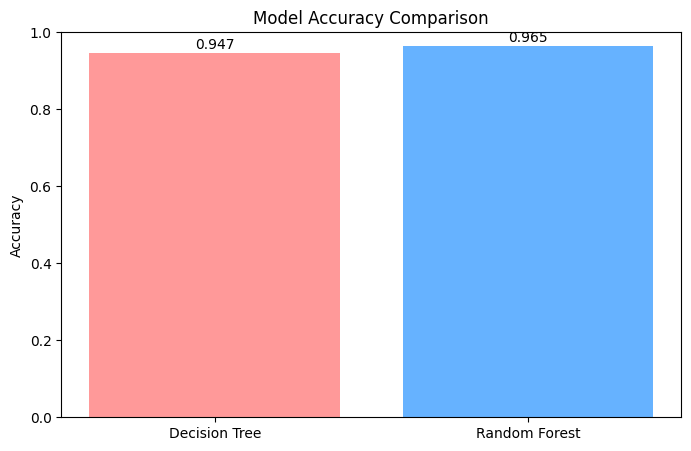

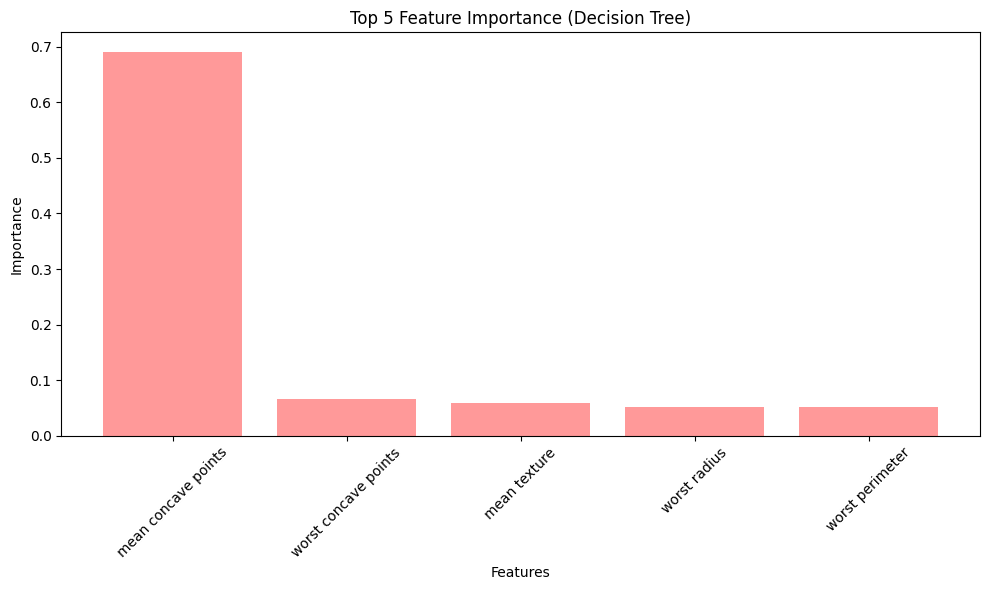

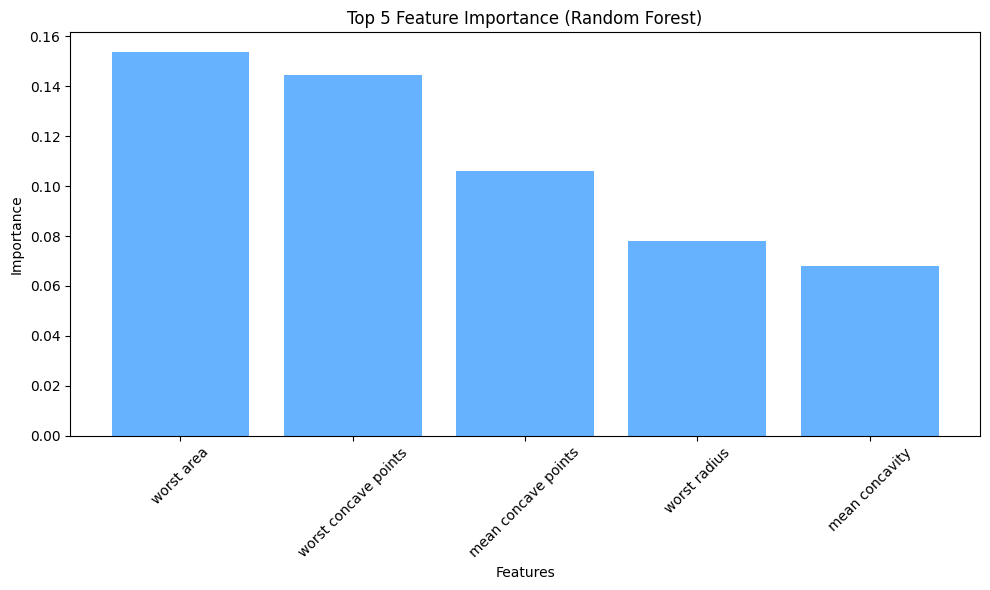

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_importance = dt_model.feature_importances_

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_importance = rf_model.feature_importances_

# Print results
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Optional: Print feature names with importance (top 5 for each)
feature_names = data.feature_names
dt_importance_dict = dict(zip(feature_names, dt_importance))
rf_importance_dict = dict(zip(feature_names, rf_importance))
sorted_dt = sorted(dt_importance_dict.items(), key=lambda x: x[1], reverse=True)[:5]
sorted_rf = sorted(rf_importance_dict.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Decision Tree Features:", sorted_dt)
print("Top 5 Random Forest Features:", sorted_rf)

# Visualization
# 1. Bar plot for accuracy comparison
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['#FF9999', '#66B2FF'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()

# 2. Bar plot for top 5 feature importance (Decision Tree)
plt.figure(figsize=(10, 6))
top_dt_features = [x[0] for x in sorted_dt]
top_dt_values = [x[1] for x in sorted_dt]
plt.bar(top_dt_features, top_dt_values, color='#FF9999')
plt.title('Top 5 Feature Importance (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar plot for top 5 feature importance (Random Forest)
plt.figure(figsize=(10, 6))
top_rf_features = [x[0] for x in sorted_rf]
top_rf_values = [x[1] for x in sorted_rf]
plt.bar(top_rf_features, top_rf_values, color='#66B2FF')
plt.title('Top 5 Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

